<a href="https://colab.research.google.com/github/Helianthusss/Retail-Store-Product-Detection-and-Recognition/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
!pip install -r requirements.txt

In [ ]:
%cd /content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
!pip install -r requirements.txt
!rm data/mydataset.yaml # nếu có
!echo 'train: ../datasets/SKU110K_fixed/val' >> data/mydataset.yaml
!echo 'val: ../datasets/SKU110K_fixed/val' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['product']" >> data/mydataset.yaml

In [ ]:
%ls

In [ ]:
%cd /content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/datasets/SKU110K_fixed/test/images

/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/datasets/SKU110K_fixed/test/images


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

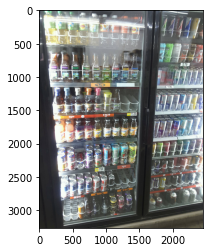

In [ ]:
from PIL import Image
# set the path to the image file
img_path = '/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/datasets/SKU110K_fixed/test/images/test_405.jpg'

# open the image file with Pillow
img = Image.open(img_path)

# display the image
plt.imshow(img)
plt.show()


In [ ]:
import os

# set the path to the images directory
images_dir = '/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/datasets/SKU110K_fixed/test/images'

# count the number of subdirectories in the images directory
num_classes = len([name for name in os.listdir(images_dir) if os.path.isdir(os.path.join(images_dir, name))])

# print the number of classes
print('Number of classes:', num_classes)

Number of classes: 0


In [8]:
# Train model YOLOv7 
%cd /content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 10 --data data/mydataset.yaml --weights 'pre_train/yolov7.pt'

/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
YOLOR 🚀 2023-2-19 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=10, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='pre_train/yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-02-24 01:53:18.189074: I tensorflow/core/platform/cpu

In [10]:
%cd /content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
!mkdir test_images
%cd test_images

/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7


In [18]:
%cd test_images

/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7/test_images


In [19]:
%ls

train_2.jpg  val_1.jpg  val_6.jpg


In [20]:
%cd /content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
!python detect.py --weights runs/train/exp3/weights/best.pt --source test_images/train_2.jpg

/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/train_2.jpg', update=False, view_img=False, weights=['runs/train/exp3/weights/best.pt'])
YOLOR 🚀 2023-2-19 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model.

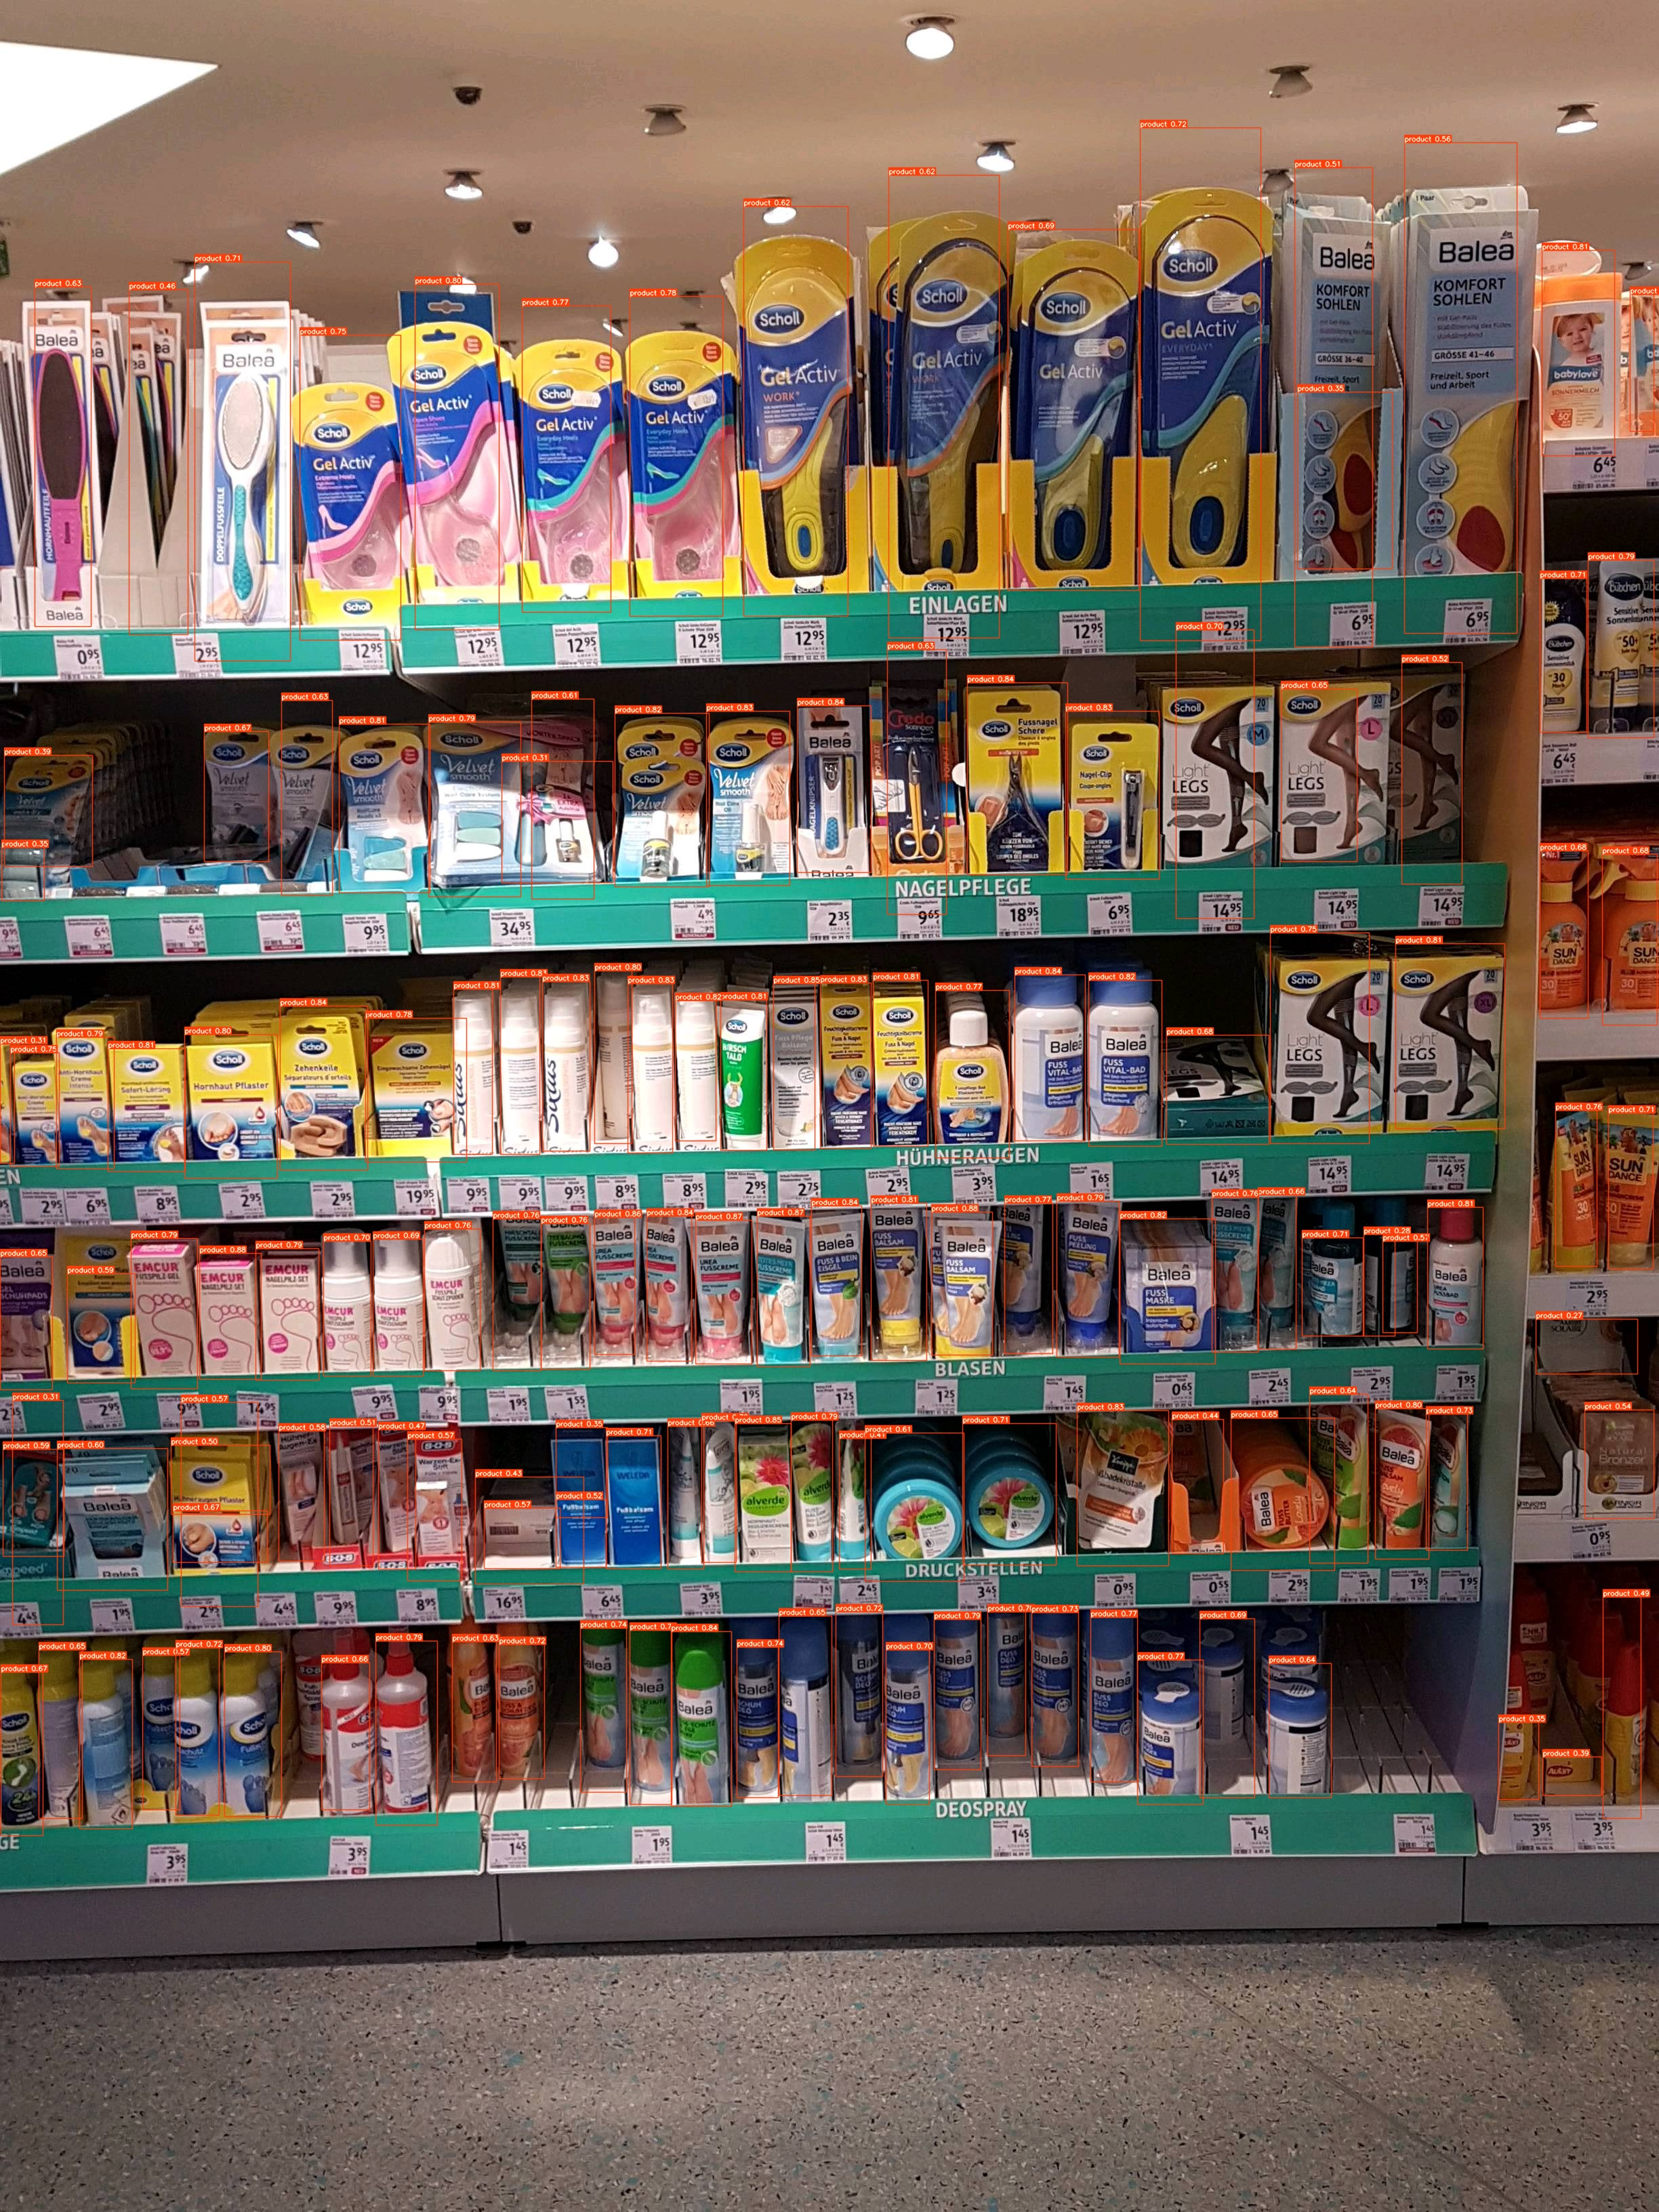

In [21]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/NCKHSV/Topic 5 Detail Product/yolov7/runs/detect/exp4/train_2.jpg"))